# OBJECTIVE: With all Food Ingredients ,Predicting the Diet of the Food Veg/Nonveg using Neural Networks
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


In [2]:
data=pd.read_csv("indian_food.csv")
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


## PREPROCESSING

In [3]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [4]:
food_vocab = set()
for ingredients in data['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [5]:
food_vocab

{'all purpose flour',
 'almond',
 'almonds',
 'aloo',
 'alum powder',
 'amaranth leaves',
 'amchur powder',
 'apricots',
 'arbi ke patte',
 'arhar dal',
 'arrowroot powder',
 'atta',
 'avocado oil',
 'axone',
 'baby corn',
 'baby potatoes',
 'badam',
 'baingan',
 'baking powder',
 'baking soda',
 'banana',
 'banana flower',
 'basmati rice',
 'bay leaf',
 'beans',
 'beaten rice flakes',
 'beef',
 'beetroot',
 'bell pepper',
 'bell peppers',
 'bengal gram flour',
 'besan',
 'besan flour',
 'bhatura',
 'bhuna chana',
 'biryani masala',
 'biryani masala powder',
 'bitter gourd',
 'black lentils',
 'black pepper',
 'black salt',
 'black sesame seeds',
 'blend rice',
 'boiled pork',
 'boiled potatoes',
 'bombay duck',
 'bombay rava',
 'boondi',
 'bottle gourd',
 'bread crumbs',
 'brinjal',
 'brown rice',
 'brown rice flour',
 'butter',
 'cabbage',
 'canned coconut milk',
 'capsicum',
 'cardamom',
 'cardamom pods',
 'cardamom powder',
 'carrot',
 'carrots',
 'cashew nuts',
 'cashews',
 'cashe

### Created a Separate Dataframe for all unique Food Ingredients

In [6]:
food_columns = pd.DataFrame()

for i,ingredients in enumerate(data['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
             food_columns.loc[i, food.strip().lower()] = 1

food_columns = food_columns.fillna(0)

In [7]:
food_columns

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
data = data.drop(['name', 'ingredients'], axis=1)


In [9]:
data

,diet,prep_time,cook_time,flavor_profile,course,state,region
0,vegetarian,45,25,sweet,dessert,West Bengal,East
1,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,vegetarian,15,60,sweet,dessert,Punjab,North
3,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...
250,vegetarian,5,30,sweet,dessert,Assam,North East
251,vegetarian,20,60,sweet,dessert,Goa,West
252,vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [10]:
#It returns all the columns with object datatype and returns the unique values inside that column 
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}


{'diet': ['vegetarian', 'non vegetarian'],
 'flavor_profile': ['sweet', 'spicy', 'bitter', '-1', 'sour'],
 'course': ['dessert', 'main course', 'starter', 'snack'],
 'state': ['West Bengal',
  'Rajasthan',
  'Punjab',
  'Uttar Pradesh',
  '-1',
  'Odisha',
  'Maharashtra',
  'Uttarakhand',
  'Assam',
  'Bihar',
  'Andhra Pradesh',
  'Karnataka',
  'Telangana',
  'Kerala',
  'Tamil Nadu',
  'Gujarat',
  'Tripura',
  'Manipur',
  'Nagaland',
  'NCT of Delhi',
  'Jammu & Kashmir',
  'Chhattisgarh',
  'Haryana',
  'Madhya Pradesh',
  'Goa'],
 'region': ['East',
  'West',
  'North',
  '-1',
  'North East',
  'South',
  'Central',
  nan]}

In [11]:
#replace the -1 into nan
data[['flavor_profile', 'state', 'region']] = data[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)


In [12]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [13]:
data = onehot_encode(
    data,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)

In [14]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45,25,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15,40,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,vegetarian,5,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,vegetarian,20,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,vegetarian,-1,-1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,vegetarian,20,45,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
data[['prep_time', 'cook_time']] = data[['prep_time', 'cook_time']].replace(-1, np.NaN)


In [16]:
data['prep_time'] = data['prep_time'].fillna(data['prep_time'].mean())
data['cook_time'] = data['cook_time'].fillna(data['cook_time'].mean())

In [17]:
label_encoder = LabelEncoder()

data['diet'] = label_encoder.fit_transform(data['diet'])

In [18]:
{index: label for index, label in enumerate(label_encoder.classes_)}


{0: 'non vegetarian', 1: 'vegetarian'}

In [19]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,1,45.000000,25.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,80.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,15.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,15.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15.000000,40.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,5.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,1,20.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,1,35.386667,38.911894,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,1,20.000000,45.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting and Scaling


In [20]:
y = data['diet']

X = data.drop('diet', axis=1)
X_food = pd.concat([X, food_columns], axis=1)

In [22]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_food = scaler.fit_transform(X_food)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y, train_size=0.7, random_state=42)

### Training (No ingredient features)


In [29]:
def build_model(num_features, hidden_layer_sizes=(64, 64)):
    inputs = tf.keras.Input(shape=(num_features,))
    x = tf.keras.layers.Dense(hidden_layer_sizes[0], activation='relu')(inputs)
    x = tf.keras.layers.Dense(hidden_layer_sizes[1], activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc')
        ]
    )
    
    return model

In [30]:
X.shape

(255, 40)

In [31]:
model = build_model(40)

batch_size = 64
epochs = 41

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)


### plotting results

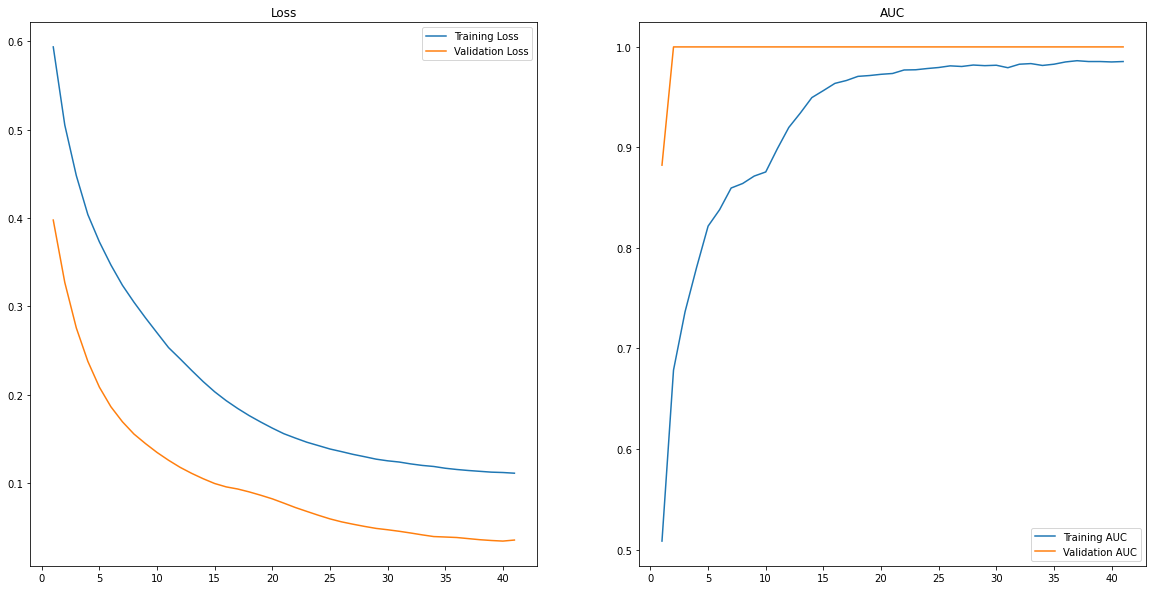

In [32]:
plt.figure(figsize=(20, 10))

epochs_range = range(1, epochs + 1)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

In [33]:
print(np.argmin(val_loss), np.argmax(val_auc))


39 1


In [34]:
model.evaluate(X_test, y_test)


3/3 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8442 - auc: 0.7214


[0.37131720781326294, 0.8441558480262756, 0.721428632736206]

In [35]:
len(y_test)


77

### Re-training with ingredient features


In [36]:
X_food.shape


(255, 405)

In [37]:
food_model = build_model(405, hidden_layer_sizes=(128, 128))

food_batch_size = 64
food_epochs = 200

food_history = food_model.fit(
    X_food_train,
    y_food_train,
    validation_split=0.2,
    batch_size=food_batch_size,
    epochs=food_epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

### plotting results

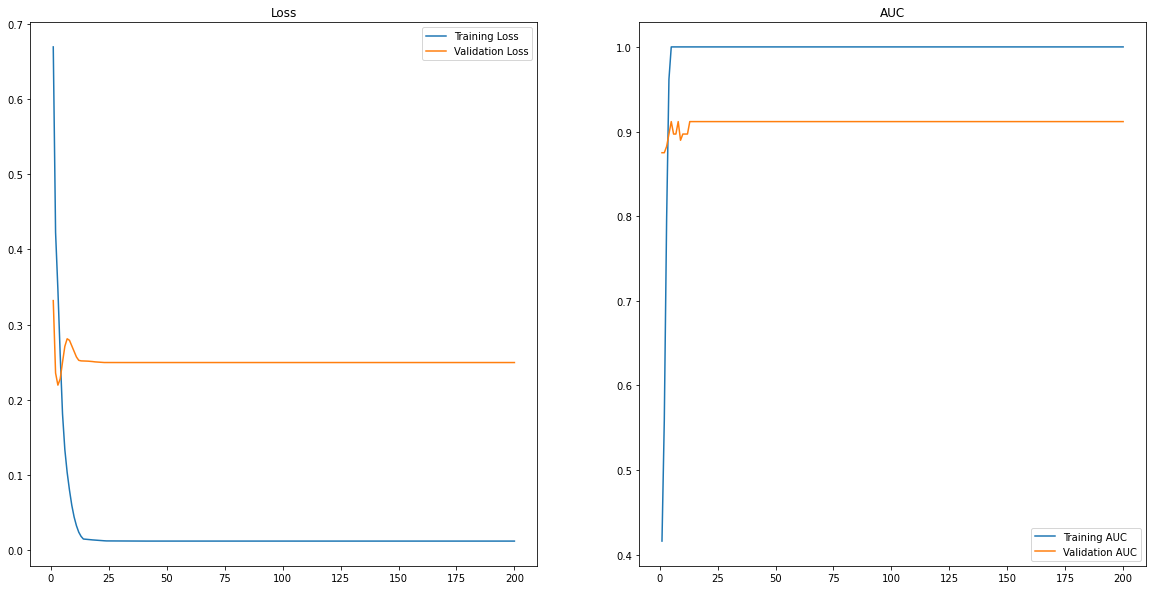

In [38]:
plt.figure(figsize=(20, 10))

food_epochs_range = range(1, food_epochs + 1)
food_train_loss, food_val_loss = food_history.history['loss'], food_history.history['val_loss']
food_train_auc, food_val_auc = food_history.history['auc'], food_history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(food_epochs_range, food_train_loss, label="Training Loss")
plt.plot(food_epochs_range, food_val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(food_epochs_range, food_train_auc, label="Training AUC")
plt.plot(food_epochs_range, food_val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()


In [39]:
print(np.argmin(food_val_loss), np.argmax(food_val_auc))


2 12


In [42]:
food_model.evaluate(X_food_test, y_food_test)


3/3 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.8571 - auc: 0.8316


[0.2840033173561096, 0.8571428656578064, 0.8316326141357422]